![Astrofisica Computacional](../../logo.PNG)

---
## 02. A Perceptron with a ReLU Activation Function


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will improve the perceptron algorithm developed in a previous lecture by incorporating an ReLU activation function.

---

## A Perceptron to transform between temperature scales

In [1]:
import numpy as np
import pandas as pd

In a previous lecture we define a class which implements a perceptron that build a linear function to fit a set of input data. The code was modified only by changing the learning rate and replacing the method `.yp()` by the method `.predict()`, 

In [2]:
class perceptron:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand()*10
        self.bias = np.random.rand()*10
        
    def predict(self, x_new):
        return np.dot(self.w, x_new) + self.bias
    
    def fC(self):
        self.yp = self.predict(self.x)
        return sum((self.yp - self.y)**2)
    
    def grad_fC(self):
        self.yp = self.predict(self.x)
        return [sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))]
    
    def improve(self):
        alpha = 1e-5# Learning Rate
        self.w -= alpha*self.grad_fC()[0]
        self.bias -= alpha*self.grad_fC()[1]
        
    def train(self, x, y, epochs):
        self.x = x
        self.y = y
        self.history = np.zeros(epochs)
        for i in range(epochs):
            self.history[i] = self.fC()
            self.improve()
            


Now, we will use this perceptron to adjust a transformation between the following temperatures given in Celsius and Kelvin scales:

In [3]:

X = np.array([-100., -50., -12., 0., 5., 32., 50., 68., 75., 81.])

y = np.array([173.15, 223.15, 261.15, 273.15, 278.15, 305.15, 323.15, 341.15,
       348.15, 354.15])

df = pd.DataFrame(X, columns=['ºC'])
df['K'] = y

df

,ºC,K
0,-100.0,173.15
1,-50.0,223.15
2,-12.0,261.15
3,0.0,273.15
4,5.0,278.15
5,32.0,305.15
6,50.0,323.15
7,68.0,341.15
8,75.0,348.15
9,81.0,354.15


We will train the perceptron using 70000 epochs and we will show the change of the cost function,

In [4]:
p = perceptron()

epochs = 70000
p.train(X, y, epochs)

history = p.history
print('initial cost = ', history[0])
print(f'final cost after {epochs:.0f} epochs = ', history[-1])

initial cost =  1301518.7592749153
final cost after 70000 epochs =  3.0704462781209265e-06


The trained perceptron has the parameters

In [5]:
print('w = ', p.w)
print('b = ', p.bias)

w =  1.0000025905816032
b =  273.1494263570357


These parameters shows that the algorithm 'learned' by the perceptron corresponds to the transformation equation (ºC to K)

\begin{equation}
K = ºC + 273.15 
\end{equation}

This function is correct, but the perceptron has one little flaw: When we predict for some values of temeperature in Celsius, we can obtain negative temperatures in Kelvin!,

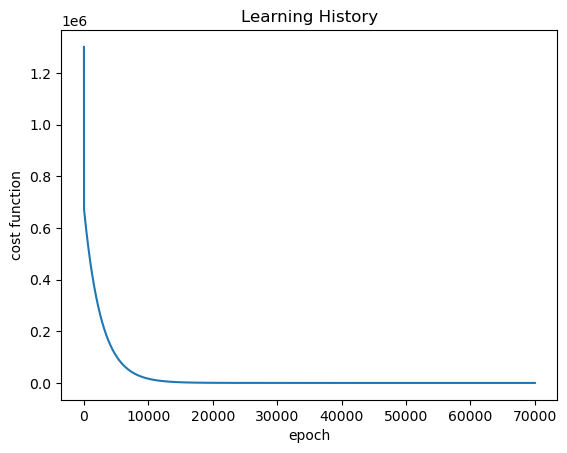

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.title('Learning History')
plt.show()

In [7]:
p.predict(-300)

-26.85135081744528


---

## Introducing a ReLU activation function

There are many ways to correct the algorithm in order to prevent negative temperatures in the Kelvin scale. We will introduce a new activation function called **Re**ctified **L**inear **U**nit or **ReLU**. This is a piecewise linear function that will output  the inpout directly if it is positive or zero otherwise,

\begin{equation}
\text{ReLU} (z) = 
\begin{cases}
z \text{ if }z>0\\
0 \text{ if }z \leq 0 
\end{cases}
\end{equation}

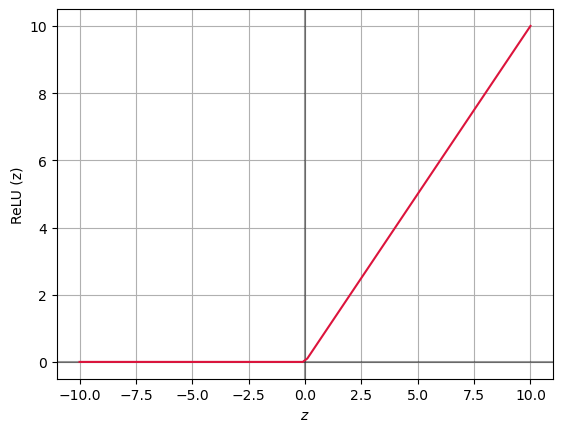

In [8]:
import matplotlib.pyplot as plt

def relu(z):
    y = np.zeros_like(z)
    for i in range(len(z)):
        if z[i]>0:
            y[i] = z[i]
        else:
            y[i] = 0
    return y

z = np.linspace(-10,10,100)



plt.figure()
plt.axhline(0, color='black', alpha=0.4)
plt.axvline(0, color='black', alpha=0.4)
plt.plot(z, relu(z), color='crimson')
plt.xlabel(r'$z$')
plt.ylabel(r'ReLU (z)')
plt.grid()
plt.show()

Now we will introduce the ReLU activation function as a new method inside the perceptron class so that

\begin{equation}
y^p (x) = \text{ReLU}(z(x))  = \text{ReLU}(w x + b) = 
\begin{cases}
w x + b &\text{ if } w x + b >0\\
0 &\text{ if }w x + b \leq 0 
\end{cases}
\end{equation}

However, there is a catch: in order to train our perceptron, we must modify the cost function and its gradient.

First, note that the cost function will be now

\begin{equation}
f_C (y^p, y) = \sum _i (y^p_i - y_i)^2 = \sum_i \left[ \text{ReLU}(z_i ) - y_i\right]^2 = \sum_i \left[ \text{ReLU}(w x_i + b) - y_i\right]^2 
\end{equation}

Therefore the gradient of the cost function is now

\begin{align}
\frac{\partial f_C}{\partial w} = & 2 \sum_i \left[\text{ReLU}(z_i ) - y_i\right] \frac{\partial \text{ReLU}}{\partial z_i} \frac{\partial z_i}{\partial w} = 2 \sum_i \left[\text{ReLU}(z_i ) - y_i\right]x_i \frac{\partial \text{ReLU}}{\partial z_i}  \\
\frac{\partial f_C}{\partial b} = &2 \sum_i \left[\text{ReLU}(z_i ) - y_i\right] \frac{\partial \text{ReLU}}{\partial z_i} \frac{\partial z_i}{\partial b} = 2 \sum_i \left[\text{ReLU}(z_i ) - y_i\right] \frac{\partial \text{ReLU}}{\partial z_i}
\end{align}

From the definition of the ReLU function we finally obtain

\begin{align}
\frac{\partial f_C}{\partial w} = &
2 \sum_i \left[\text{ReLU}(z_i ) - y_i\right]x_i \times \begin{cases} 1 &\text{ if } z_i >0\\
0 &\text{ if } z_i \leq 0
\end{cases}\\
\frac{\partial f_C}{\partial b} = &2 \sum_i \left[\text{ReLU}(z_i ) - y_i\right]  \times \begin{cases} 1 &\text{ if } z_i >0\\
0 &\text{ if } z_i \leq 0
\end{cases}
\end{align}

In [9]:
class perceptron:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand()*10
        self.bias = np.random.rand()*10
    
    def relu(self, z):
        y = np.zeros_like(z)
        for i in range(len(z)):
            if z[i]>0:
                y[i] = z[i]
            else:
                y[i] = 0
        return y
        
    def predict(self, x_new):
        z = np.dot(self.w, x_new) + self.bias
        return self.relu(z)
    
    def fC(self):
        self.yp = self.predict(self.x)
        return sum((self.yp - self.y)**2)
    
    def grad_fC(self):
        self.yp = self.predict(self.x)
        return [sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))]
    
    def improve(self):
        alpha = 1e-5 # Learning Rate
        self.w -= alpha*self.grad_fC()[0]
        self.bias -= alpha*self.grad_fC()[1]
        
    def train(self, x, y, epochs):
        self.x = x
        self.y = y
        self.history = np.zeros(epochs)
        for i in range(epochs):
            self.history[i] = self.fC()
            self.improve()




In [10]:
p = perceptron()

epochs = 75000
p.train(X, y, epochs)
history = p.history
print('initial cost = ', history[0])
print(f'final cost after {epochs:.0f} epochs = ', history[-1])

initial cost =  354141.12980680476
final cost after 75000 epochs =  6.280769490489373e-07


In [11]:
print('w = ', p.w)
print('b = ', p.bias)

w =  1.00000117166364
b =  273.14974055378025


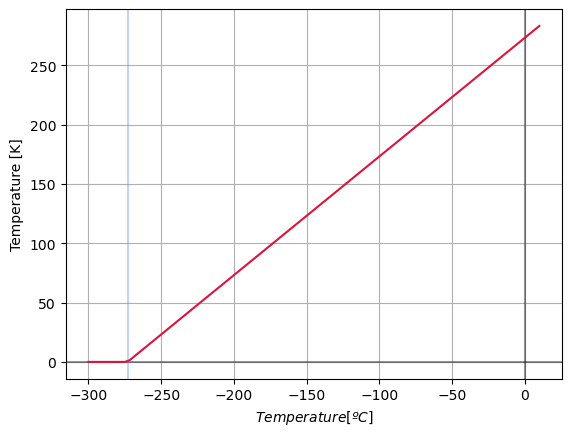

In [12]:
X = np.linspace(-300,10,100)



plt.axhline(0, color='black', alpha=0.4)
plt.axvline(0, color='black', alpha=0.4)
plt.axvline(-273.15, color='cornflowerblue', alpha=0.4)
plt.plot(X, p.predict(X), color='crimson')
plt.xlabel(r'$Temperature [ºC]$')
plt.ylabel(r'Temperature [K]')
plt.grid()
plt.show()

--

--

--

In [ ]:
def CtoK(C):
    return C + 273.15

celsius = np.array([-100., -50., -12., 0., 5., 32., 50., 68., 75., 81.])

kelvin = CtoK(celsius)
kelvin

In [ ]:
celsius = np.array([-100., -50., -12., 0., 5., 32., 50., 68., 75., 81.])

kelvin = np.array([173.15, 223.15, 261.15, 273.15, 278.15, 305.15, 323.15, 341.15,
       348.15, 354.15])